# Detecting Random Domain Names

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

plt.style.use('seaborn-whitegrid')

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
column_names = ['domain', 'entropy']
df = pd.read_csv('../data/external/agg-alexa-entropy.gz', names=column_names)

# Create a new column where entropy value is rounded (for visualisation)
df['entropy_rnd'] = df['entropy'].round(2)

In [6]:
df.head()

,domain,entropy,entropy_rnd
0,0597kk.com,2.251629,2.25
1,0800-horoscope.com,3.128085,3.13
2,0j0.jp,0.918296,0.92
3,0pb.org,1.584963,1.58
4,1-2-3.fr,1.921928,1.92


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4036467 entries, 0 to 4036466
Data columns (total 3 columns):
domain         object
entropy        float64
entropy_rnd    float64
dtypes: float64(2), object(1)
memory usage: 92.4+ MB


In [9]:
df.describe()

,entropy,entropy_rnd
count,4.036467e+06,4.036467e+06
mean,2.913804e+00,2.913679e+00
std,5.125407e-01,5.127448e-01
min,-0.000000e+00,-0.000000e+00
25%,2.584963e+00,2.580000e+00
50%,2.947703e+00,2.950000e+00
75%,3.272906e+00,3.270000e+00
max,4.700440e+00,4.700000e+00


## Entropy of google.com

In [10]:
df[df['domain'] == 'google.com']

,domain,entropy,entropy_rnd
1898617,google.com,1.918296,1.92


## Distribution

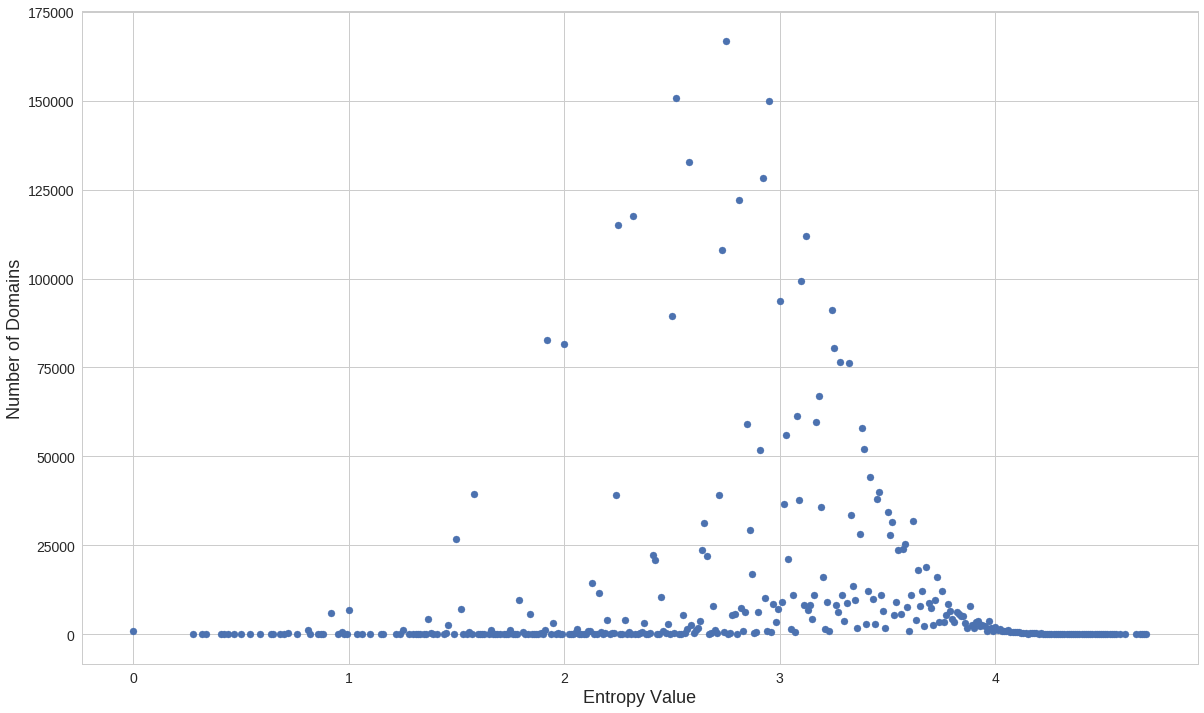

In [16]:
dist_df = df.groupby(['entropy_rnd'])['domain'].count()

X = dist_df.index
Y = dist_df.values

fig, ax = plt.subplots(figsize=(20, 12))
ax.set_xlabel('Entropy Value')
ax.set_ylabel('Number of Domains')
ax.scatter(X, Y)

## Sample data

In [148]:
df[(df['entropy'] > 2) & (df['entropy'] <= 3)].sample(10)

,domain,entropy,entropy_rnd
2523836,infinitetechinfo.com,2.827820,2.83
3989604,7889815.com,2.128085,2.13
720830,wrapapi.com,2.235926,2.24
2110221,cels.org.ar,3.000000,3.00
1024625,8foxes.com,2.584963,2.58
2266559,bolbolabadi.com,2.481715,2.48
856239,likodrom.com,2.750000,2.75
409707,riskygear.com,2.947703,2.95
355918,kghrpc.org,2.584963,2.58
3741377,bigdatatraining.in,2.872906,2.87


In [156]:
df[(df['entropy'] > 3) & (df['entropy'] < 4)].sample(10)

,domain,entropy,entropy_rnd
1927657,gassani.com.au,3.095795,3.10
2755531,autotransito.com.br,3.280639,3.28
1437690,thewebminer.com,3.027169,3.03
3878090,pricklytech.wordpress.com,3.784942,3.78
708649,malcolmreading.co.uk,3.499228,3.50
1954338,pc-tophonecallswithvoip.ga,3.675311,3.68
1391743,anunciosgratis1.com,3.373557,3.37
1919754,medstreaming.net,3.251629,3.25
1062760,freecinema21.ga,3.188722,3.19
1065886,mymeubledeco.com,3.022055,3.02


In [158]:
df[(df['entropy'] >= 4) & (df['entropy'] < 4.2)].sample(10)

,domain,entropy,entropy_rnd
1705852,chicas-8765online.blogspot.com.es,4.148394,4.15
3767916,clickforbestforupdating4u.pro,4.083856,4.08
260390,customdesignpreview-ud.blogspot.com.es,4.114718,4.11
2236456,fishmonger-nora-60677.netlify.com,4.142295,4.14
2524752,newhairstylesformen2014.com,4.055958,4.06
3287362,notadream5670.blogspot.com.eg,4.085055,4.09
3585466,v91-evil-energy.myshopify.com,4.023465,4.02
295405,myanmarnightlife.blogspot.com,4.003856,4.00
1162406,herts365-my.sharepoint.com,4.004886,4.00
73013,fuckyeahizzycornish.tumblr.com,4.161978,4.16


In [162]:
df[(df['entropy'] >= 4.2) & (df['entropy'] < 4.3)].sample(10)

,domain,entropy,entropy_rnd
1063185,7043583317540849732_9712df84f8cdca5cbd0b21239b...,4.297396,4.30
3687396,humanityfirst24x7.wordpress.com,4.254525,4.25
3950863,4665001611226914861_725605e6d0b31402a99031d68a...,4.230438,4.23
2582703,5957349740615950937_7810ae48bd977048a8096d2cbe...,4.266022,4.27
2683056,7825335010365166249_49c580ad1b557220e0b6ffbbfd...,4.296789,4.30
2048611,gleason-robel2602.myshopify.com,4.208410,4.21
78109,4628741720962837393_c14588176b303194802f9fc0fa...,4.275515,4.28
356176,com-s4956j71o408o798czpzbizfeb2.xyz,4.260333,4.26
1343897,googladworduquestionanswerapril2016.blogspot.in,4.202972,4.20
2454667,ku365-my.sharepoint.com,4.247928,4.25


In [165]:
df.loc[[463856, 3435801, 3163763, 1460885, 2097504, 746362, 1110089, 2051732, 3671726, 1714086, 356176, 2683056, 1063185]]

,domain,entropy,entropy_rnd
463856,5268189219098852476_1659950da3401138e6f743af3d...,4.196464,4.20
3435801,5975476146896658700_a9140274977489c2afed995047...,4.139100,4.14
3163763,3565292900911222423_bc59a6fb5d5a2282067a69f499...,4.100054,4.10
1460885,4725434628645046622_270d300fa2436f2076813211e8...,4.186130,4.19
2097504,ipcloudstaticcontentpwb6o2md5o7os.azurewebsite...,4.219928,4.22
746362,4565706482822602958_5a9863e1e79ea8d04c7242d141...,4.259291,4.26
1110089,8006829144605451534_c010b6e6319fb4dbc80e78a41a...,4.261540,4.26
2051732,xhwtilplkmvbxumaxwmpaqexnwxypcyndhjokwqkxcwbbs...,4.220686,4.22
3671726,asdfnjipwerunxmn.blogspot.ae,4.213661,4.21
1714086,4759234592387690711_19cff75a0c1b1c16181deaaa61...,4.239719,4.24


In [178]:
df[df['entropy'] >= 4.5].sample(10)

,domain,entropy,entropy_rnd
2069586,com-jmkcrh1aseqi3fpxlzgnfeb5.xyz,4.521641,4.52
3869941,abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrst...,4.670871,4.67
3233713,vadabzauefrpph4xraz8ewblhsbsbxkfq7sx8d9me4nuem...,4.652138,4.65
2649129,gfxtym4otglvcci3pj9gqqhi53ft0r.eu-central-1.el...,4.689898,4.69
2783769,fwsrkzlxatnhyejpvmoducgqibl.jp,4.680813,4.68
802757,virusb9862-ouch95f0c-stop7f953-ordinateur-manq...,4.579858,4.58
2367692,abcdefghijklmnopqrstuvwxyz.org,4.700440,4.70
248962,abcdefghijklmn-pqrstuvwxyz.com,4.700440,4.70
1625276,y5wflt0xibmoufuvsayg1efy80yq0ystkjncf76cqm.com,4.526495,4.53
838339,flowxo-staging-59237634.herokuapp.com,4.597276,4.60


In [65]:
df_sorted = df.sort_values(['entropy'])

In [66]:
df_sorted[df_sorted['entropy'] > 4.1].head(20)

,domain,entropy,entropy_rnd
3163763,3565292900911222423_bc59a6fb5d5a2282067a69f499...,4.100054,4.1
3162204,divyaworkfromhome.blogspot.in,4.100069,4.1
2127178,thefunblocked-games.weebly.com,4.100069,4.1
879044,2252356152637482391_ed6056732238a45798896e0b77...,4.100389,4.1
1672622,oceanographer-pass-20011.bitballoon.com,4.100712,4.1
2804874,teak-furniture-shop-company.myshopify.com,4.100817,4.1
1288125,fantasypremierleaguehints.blogspot.co.uk,4.100817,4.1
3324552,www-kashmerekollections-com.myshopify.com,4.100817,4.1
2633917,prod-wingit-adminportal.azurewebsites.net,4.100817,4.1
2113961,interior-decorator-peak-67127.netlify.com,4.100817,4.1


In [67]:
df_sorted[df_sorted['entropy'] > 4.2].head(20)

,domain,entropy,entropy_rnd
3611427,0a6971acb0519700f15bb07a382de43f.bitballoon.com,4.200008,4.2
3631532,morgan-the-mothafuckin-princess.tumblr.com,4.201232,4.2
791552,whydisignuponthisgodforsakensite.tumblr.com,4.201693,4.2
2795231,2496954589615273762_b5f045756352e6bc66a8c7b4d1...,4.201747,4.2
188438,7046476957414715216_db0f0438df7bd7d958c568c288...,4.201787,4.2
173141,fh126cloud.sharepoint.com,4.201841,4.2
1462218,shades-of-pink.tumblr.com,4.201841,4.2
3732837,kangjunseo0312.tumblr.com,4.201841,4.2
3085840,psycholove4380.tumblr.com,4.201841,4.2
1972660,o365cmu-my.sharepoint.com,4.201841,4.2


In [68]:
df_sorted[df_sorted['entropy'] > 4.5].head(20)

,domain,entropy,entropy_rnd
1884334,myvtw-1ce7df9a7cd021.sharepoint.com,4.502583,4.50
12770,dvideohotnew-girlbeautyfull7412.duckdns.org,4.509385,4.51
2069586,com-jmkcrh1aseqi3fpxlzgnfeb5.xyz,4.521641,4.52
3364316,adminb57813602-my.sharepoint.com,4.521641,4.52
3670006,kortrijk---test-t6dnbai-2ha5dfszjjg7c.eu.platf...,4.523201,4.52
1625276,y5wflt0xibmoufuvsayg1efy80yq0ystkjncf76cqm.com,4.526495,4.53
3299819,qaz123wsx456edc.livejournal.com,4.532665,4.53
2860094,com-feb4vbd385h8kh6uj3aq8gfskin2.xyz,4.538910,4.54
2939885,b1-failure-com-0xt5q2yvzsq3sl8.bid,4.548394,4.55
1586982,zbfncjtaiwngdsrxvykupflpibvbrewhemghxlwsdoluaz...,4.558563,4.56
